In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-10-30 15:59:26 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-10-30 15:59:27 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-10-30 15:59:27 __main__ INFO     transformers.__version__='4.55.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

2025-10-30 15:59:30 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-10-30 15:59:30 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-10-30 15:59:30 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-10-30 15:59:30 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-10-30 15:59:33 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-10-30 15:59:33 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-10-30 15:59:33 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-10-30 15:59:33 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-10-30 15:59:33 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-10-30 16:00:16 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-10-30 16:00:16 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-10-30 16:00:17 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
# from src.functional import free_gpu_cache

# # SYNTH_DATASET = "icosahedron_1"
# SYNTH_DATASET = "64"

# checkpoint_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "trained_params",
#     f"{SYNTH_DATASET}",
#     "_full__clamp=0.001",
#     model_key.split("/")[-1],
# )

# version = "epoch_1"
# # version = "final_model"

# checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

# print(os.listdir(checkpoint_path))

# checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

# loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# # loaded_deltas

# free_gpu_cache()


# d = loaded_deltas["model<>layers<>5<>mlp<>gate_proj"]
# d.abs().max()

In [7]:
# from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

# #################################################
# Trainable_CLS = TrainableLM_delta
# # Trainable_CLS = TrainableLM_LoRA
# #################################################

# Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

In [8]:
###############################################################################
LAYERS = None
HEADS = [
    # (33, 45),
    # (33, 18),
    # (34, 1),
    # (34, 6),
    # (34, 7),
    (35, 19),
    # (39, 40),
    # (42, 30),
    # (47, 18),
    # (52, 58),
]

# LAYERS = [54, 60, 67]
# HEADS = [
#     (54, 44),
#     (54, 63),
#     (55, 43),
#     (55, 29),
#     (60, 9),
#     (60, 25),
#     (60, 42),
#     (67, 51)
# ]
###############################################################################

2025-10-30 16:00:47 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-10-30 16:00:47 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-10-30 16:00:47 matplotlib DEBUG    interactive is False
2025-10-30 16:00:47 matplotlib DEBUG    platform is linux
2025-10-30 16:00:47 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-10-30 16:00:47 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-10-30 16:00:48 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-10-30 16:00:48 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-10-30 16:00:48 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-10-30 16:00:48 matplotlib.font

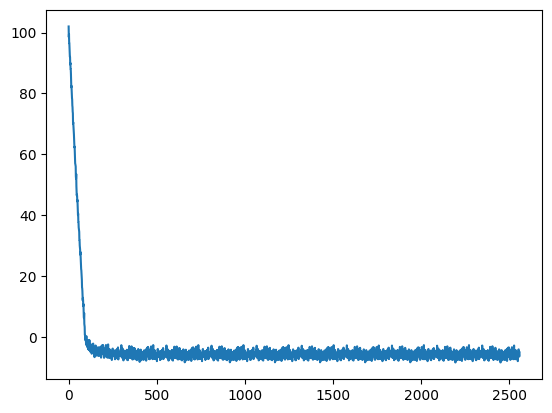

In [9]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_backup_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/optimized_heads",
    model_key.split("/")[-1],
    "distinct_options",
    # f"{select_task.task_name}",
    "select_one",
    # "legacy",
    "epoch_10.npz"
)

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "test_opt_code",
#     model_key.split("/")[-1],
#     "distinct_options",
#     f"{select_task.task_name}",
#     # "select_one",
#     "legacy",
#     "epoch_10.npz"
# )

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

79


(True, True)

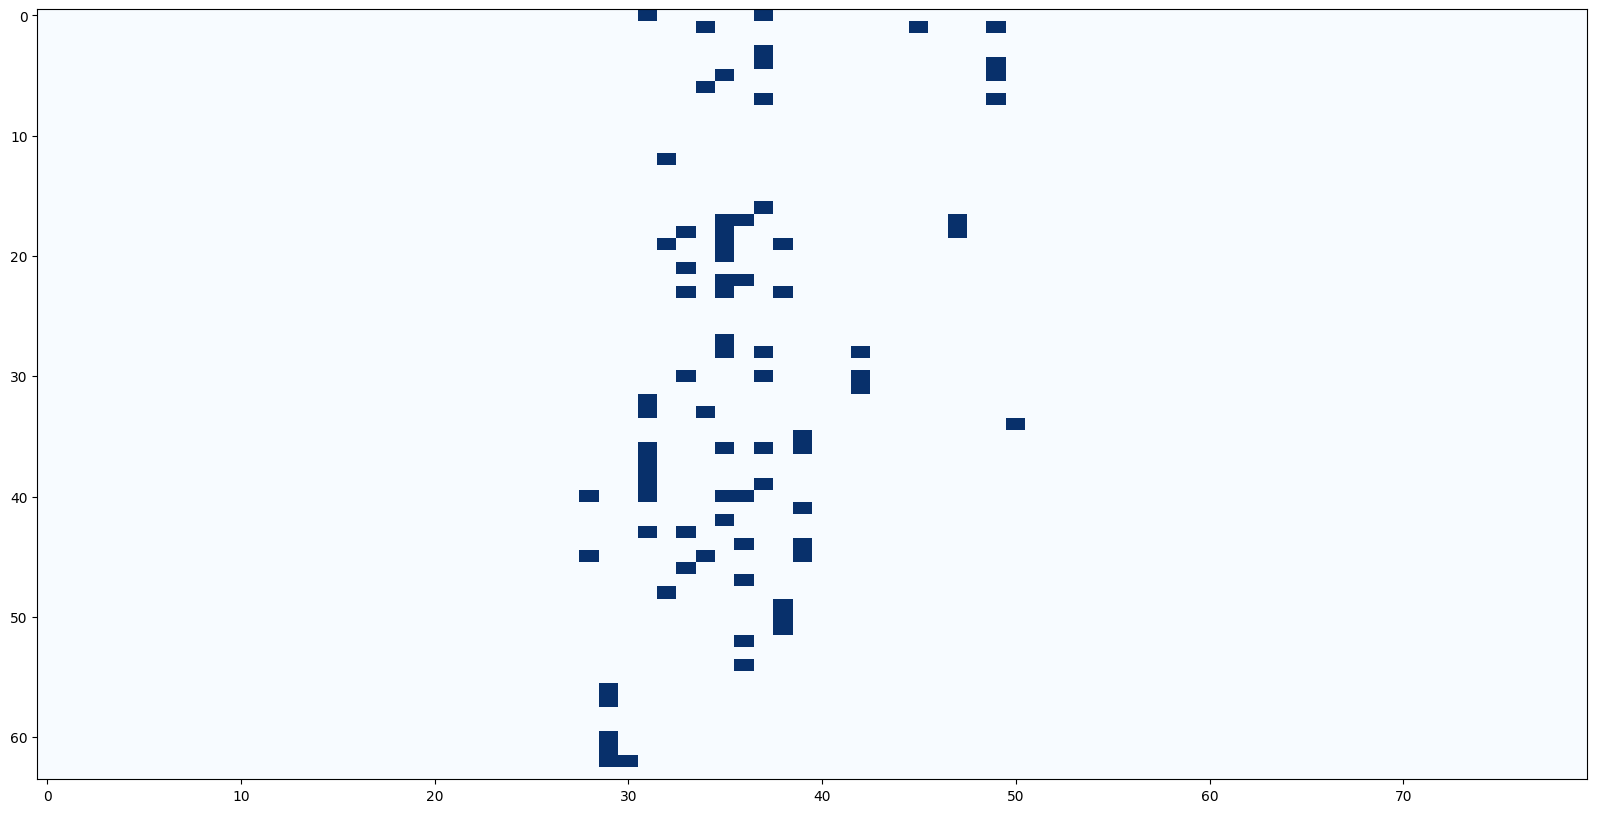

In [10]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
optimal_head_mask[52:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

optimized_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
optimized_heads = [
    (layer_idx, head_idx) for layer_idx, head_idx in optimized_heads
]
print(len(optimized_heads))

HEADS = optimized_heads

(35, 19) in HEADS, (35, 19) in optimized_heads
# [(29, 3) in HEADS]

In [11]:
from src.selection.data  import SelectOneTask

select_task = SelectOneTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR,
        "selection",
        "rhymes.json"
    )
)

print(select_task)

['name', 'prompt_templates', 'categories']
SelectOneTask: (rhymes with different sounds)
Categories: oo(10), ee(10), ay(10), ai(10), oh(10), et(10), at(10), ight(10), ake(10), ing(10), own(10)



In [12]:
sample = select_task.get_random_sample(
    mt=mt, 
    # category="politician",
    filter_by_lm_prediction=True,
    prompt_template_idx=3,
    n_distractors=5,
)
print(sample.prompt(), ">>", mt.tokenizer.decode(sample.ans_token_id))

ight >> ['plight', 'might', 'fight', 'right', 'light', 'bright', 'flight', 'sight', 'night', 'tight']
Options: bring, flee, way, way, yet, light.
Which of these words rhymes with right?
Answer: >>  light


In [39]:
from src.selection.functional import verify_head_patterns
prompt=sample.prompt()

# prompt = """Which person from the following list has their occupation in common with Samuel L. Jackson? 
# Options: Norah O'Donnell, Julia Roberts, Rory McIlroy, Petra Kvitová, Christian Louboutin, Wes Anderson. 
# Answer:"""

# prompt = """options: 
# 1. The Space Needle 
# 2. Louvre Museum 
# 3. Colosseum 
# 4. Christ the Redeemer 
# 5. State of Liberty 
# 6. Big Ben 
# Which of these landmarks is located in England?
# Answer:"""

prompt = """Which of these numbers is a multiple of 3? 
options: 43, 57, 55, 62, 39 
Answer:"""

# prompt = """John is taller than Bob, but shorter than Steve. Who is the shortest? 
# Ans:"""

# prompt = """Brad Pitt, Tom Hanks, Leonardo DiCaprio, Scarlett Johansson, Tom Brady, Hugh Jackman
# Which person from this list is different from the others?
# Answer:"""

# prompt = """Which of these items is not a fruit?
# options: Apple, Potato, Banana, Grape, Orange
# Answer:"""

# prompt = """Which of these words rhymes with the word "look"? 
# Items: orange, mat, book, rabbit, bowl, watch, mirror 
# Answer:"""

# prompt = """Items: Apple, Banana, Panda, Grape, Orange.
# How many fruits are listed above?
# Answer:"""

# prompt = """Items: cat, door, table, window, pen, keyboard.
# Which word has exactly 4 letters?
# Answer:"""
# prompt = """Which word has exactly 4 letters?
# Items: cat, door, table, window, pen, keyboard.
# Answer:"""

# prompt = """Items: zebra, monkey, elephant, tiger, lion.
# Which word comes first alphabetically?
# Answer:"""

# prompt = """Which word comes first alphabetically?
# Items: zebra, monkey, elephant, tiger, lion.
# Answer:"""

verify = verify_head_patterns(
    prompt=prompt,
    # options=sample.options,
    # pivot=sample.subj,
    mt=mt,
    heads=HEADS,
    # heads = optimized_heads,
    value_weighted=False,
    # generate_full_answer=True,
)

verify["predictions"]

2025-10-30 16:37:02 src.selection.functional DEBUG    Predictions: ['" "[220] (p=0.824, logit=21.875)', '" The"[578] (p=0.087, logit=19.625)', '" \n"[720] (p=0.028, logit=18.500)', '" To"[2057] (p=0.008, logit=17.250)', '" A"[362] (p=0.007, logit=17.125)']
2025-10-30 16:37:02 src.selection.functional INFO     Combined attention matrix for all heads


[PredictedToken(token=' ', prob=0.82421875, logit=21.875, token_id=220, metadata=None),
 PredictedToken(token=' The', prob=0.0869140625, logit=19.625, token_id=578, metadata=None),
 PredictedToken(token=' \n', prob=0.0281982421875, logit=18.5, token_id=720, metadata=None),
 PredictedToken(token=' To', prob=0.00811767578125, logit=17.25, token_id=2057, metadata=None),
 PredictedToken(token=' A', prob=0.00714111328125, logit=17.125, token_id=362, metadata=None)]

In [40]:
from circuitsvis.tokens import colored_tokens
import json

query_idx = -1
start_from = 1

tokens = verify["attn_matrices"].tokenized_prompt[start_from:]
attn_patterns = verify["attn_matrices"].attention_matrices

combined = []
for layer_idx, head_idx in HEADS:
    head_pattern = attn_patterns[(layer_idx, head_idx)][query_idx][start_from:]
    combined.append(head_pattern)

combined_attn = np.mean(np.array(combined), axis=0)

print(
    json.dumps(
        [list(tup) for tup in zip(tokens, [score.item() for score in combined_attn])]
    )
)

display(colored_tokens(tokens=tokens, values=combined_attn))

[["Which", 0.022998375818133354], [" of", 0.005533072166144848], [" these", 0.002575702965259552], [" numbers", 0.009169035591185093], [" is", 0.008487285114824772], [" a", 0.005712971091270447], [" multiple", 0.01851518824696541], [" of", 0.007503050845116377], [" ", 0.002753616776317358], ["3", 0.024812988936901093], ["?", 0.02286461926996708], [" \n", 0.01192422490566969], ["options", 0.007167408708482981], [":", 0.005397899076342583], [" ", 0.009724967181682587], ["43", 0.01698365993797779], [",", 0.012887978926301003], [" ", 0.013020177371799946], ["57", 0.08245849609375], [",", 0.01145172119140625], [" ", 0.021833045408129692], ["55", 0.015297156758606434], [",", 0.009683964774012566], [" ", 0.006563439965248108], ["62", 0.010130480863153934], [",", 0.005656519904732704], [" ", 0.007241575047373772], ["39", 0.07608862966299057], [" \n", 0.0346250906586647], ["Answer", 0.02111094258725643], [":", 0.04864075779914856]]


In [23]:
verify = verify_head_patterns(
    prompt=sample.prompt,
    options=sample.options,
    pivot=sample.match_with,
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)

verify["predictions"]

AttributeError: 'SelectionSample' object has no attribute 'match_with'

In [17]:
prompt_template = """{}
Who among these people mentioned above is by profession a {}?
Answer:"""

sample.options = ["Norah O'Donnell", "Julia Roberts", "Rory McIlroy", "Petra Kvitová", "Christian Louboutin", "Wes Anderson"]
# prompt = prompt_template.format(
#     ", ".join(sample.options),
#     sample.metadata["attribute"]
# )

last_name_first = []
for name in sample.options:
    first_name = name.split(" ")[0]
    last_name = " ".join(name.split(" ")[1:])
    last_name_first.append(f"{last_name}, {first_name}")

prompt = prompt_template.format(
    "\n".join(f"{idx+1}. {name}" for idx, name in enumerate(last_name_first)),
    sample.metadata["attribute"]
)

# prompt = sample.prompt

print(prompt, " >> ")

verify = verify_head_patterns(
    prompt=prompt,
    options=sample.options,
    pivot=sample.match_with,
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)

verify["predictions"]

1. O'Donnell, Norah
2. Roberts, Julia
3. McIlroy, Rory
4. Kvitová, Petra
5. Louboutin, Christian
6. Anderson, Wes
Who among these people mentioned above is by profession a actor?
Answer:  >> 
2025-08-01 14:16:21 __main__ DEBUG    Generated full answer: " Julia Roberts is an American actress and producer. She is one of the most successful actresses in Hollywood, known for her iconic roles in movies such as ""
2025-08-01 14:16:22 __main__ DEBUG    Predictions: ['" Julia"[40394] (p=0.332, logit=19.625)', '" Roberts"[31248] (p=0.260, logit=19.375)', '" "[220] (p=0.139, logit=18.750)', '" ("[320] (p=0.051, logit=17.750)', '" Option"[7104] (p=0.045, logit=17.625)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:16:22 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:16:22 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:16:22 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:16:22 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:16:22 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:16:23 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:16:23 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:16:23 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:16:23 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:16:23 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Julia', prob=0.33203125, logit=19.625, token_id=40394, metadata=None),
 PredictedToken(token=' Roberts', prob=0.259765625, logit=19.375, token_id=31248, metadata=None),
 PredictedToken(token=' ', prob=0.138671875, logit=18.75, token_id=220, metadata=None),
 PredictedToken(token=' (', prob=0.051025390625, logit=17.75, token_id=320, metadata=None),
 PredictedToken(token=' Option', prob=0.045166015625, logit=17.625, token_id=7104, metadata=None)]

In [ ]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=last_name_first,
    pivot=sample.match_with,
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-01 14:19:06 __main__ DEBUG    O'Donnell, Norah | opt_range=(3, 10) | bare_opt_range=(4, 11) | " O'Donnell, Norah"


2025-08-01 14:19:06 __main__ DEBUG    Roberts, Julia | opt_range=(13, 16) | bare_opt_range=(4, 7) | " Roberts, Julia"
2025-08-01 14:19:06 __main__ DEBUG    McIlroy, Rory | opt_range=(19, 24) | bare_opt_range=(4, 9) | " McIlroy, Rory"
2025-08-01 14:19:06 __main__ DEBUG    Kvitová, Petra | opt_range=(27, 32) | bare_opt_range=(4, 9) | " Kvitová, Petra"
2025-08-01 14:19:06 __main__ DEBUG    Louboutin, Christian | opt_range=(35, 41) | bare_opt_range=(4, 10) | " Louboutin, Christian"
2025-08-01 14:19:07 __main__ DEBUG    Anderson, Wes | opt_range=(44, 47) | bare_opt_range=(4, 7) | " Anderson, Wes"
2025-08-01 14:19:17 __main__ DEBUG    Predictions: ['" Roberts"[31248] (p=0.314, logit=19.625)', '" Julia"[40394] (p=0.277, logit=19.500)', '" "[220] (p=0.149, logit=18.875)', '" ("[320] (p=0.048, logit=17.750)', '" Option"[7104] (p=0.043, logit=17.625)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:19:18 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:19:18 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:19:18 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:19:18 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:19:18 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:19:18 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:19:18 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:19:18 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:19:19 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:19:19 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Roberts', prob=0.314453125, logit=19.625, token_id=31248, metadata=None),
 PredictedToken(token=' Julia', prob=0.27734375, logit=19.5, token_id=40394, metadata=None),
 PredictedToken(token=' ', prob=0.1494140625, logit=18.875, token_id=220, metadata=None),
 PredictedToken(token=' (', prob=0.04833984375, logit=17.75, token_id=320, metadata=None),
 PredictedToken(token=' Option', prob=0.042724609375, logit=17.625, token_id=7104, metadata=None)]

### Different Attribute

In [20]:
from src.selection.data  import load_people_by_category

people_by_nationality = load_people_by_category(
    tokenizer = mt.tokenizer,
    path = os.path.join(env_utils.DEFAULT_DATA_DIR, "selection_real/nationality.json")
)
list(people_by_nationality.keys())

2025-08-01 14:19:41 src.selection.data INFO     Loaded 16 categories


['Switzerland',
 'UAE',
 'Singapore',
 'Canada',
 'Mexico',
 'Brazil',
 'India',
 'Australia',
 'Israel',
 'South Africa',
 'United Kingdom',
 'Trinidad and Tobago',
 'New Zealand',
 'United States',
 'Belgium',
 'France']

In [22]:
from src.selection.data import get_random_sample

sample = get_random_sample(
    people_by_category=people_by_nationality,
    mt=mt,
    category="nationality",
    attribute="Australia",
    n_distractors=5
)
print(sample.prompt, ">>", sample.obj)

Which person from the following list has their nationality in common with Margot Robbie?
Options: J.K. Rowling, Ronaldo Nazário, Justin Bieber, Dick Lee, Elle Macpherson, Christian Louboutin.
Ans: >> Elle Macpherson


In [23]:
from src.functional import generate_with_patch, predict_next_token

# prompt_template = """Which of these peoples is by profession a {}?
# options: {}
# Answer:"""
# prompt = prompt_template.format(
#     sample.metadata["attribute"],
#     ", ".join(sample.options)
# )

prompt_template = """{}
Who among these people mentioned above is from {}?
Answer:"""
prompt = prompt_template.format(
    ", ".join(sample.options),
    sample.metadata["attribute"]
)

print(prompt, " >> ", sample.obj)

J.K. Rowling, Ronaldo Nazário, Justin Bieber, Dick Lee, Elle Macpherson, Christian Louboutin
Who among these people mentioned above is from Australia?
Answer:  >>  Elle Macpherson


In [ ]:
verify = verify_head_patterns(
    prompt=prompt,
    options=sample.options,
    pivot=sample.match_with,
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)

verify["predictions"]

2025-08-01 14:20:45 __main__ DEBUG    Generated full answer: " Elle Macpherson
Elle Macpherson is an Australian model, businesswoman, television host, and actress. She is known for her record"
2025-08-01 14:20:45 __main__ DEBUG    Predictions: ['" Elle"[46408] (p=0.969, logit=22.375)', '" The"[578] (p=0.011, logit=17.875)', '" Only"[8442] (p=0.004, logit=16.875)', '" "[220] (p=0.003, logit=16.500)', '" None"[2290] (p=0.002, logit=15.938)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:20:46 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:20:46 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:20:46 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:20:46 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:20:46 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:20:46 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:20:46 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:20:46 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:20:46 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:20:47 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Elle', prob=0.96875, logit=22.375, token_id=46408, metadata=None),
 PredictedToken(token=' The', prob=0.0107421875, logit=17.875, token_id=578, metadata=None),
 PredictedToken(token=' Only', prob=0.00396728515625, logit=16.875, token_id=8442, metadata=None),
 PredictedToken(token=' ', prob=0.002716064453125, logit=16.5, token_id=220, metadata=None),
 PredictedToken(token=' None', prob=0.00154876708984375, logit=15.9375, token_id=2290, metadata=None)]

In [ ]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=sample.options,
    pivot=sample.match_with,
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)

verify_ind["predictions"]

2025-08-01 14:21:25 __main__ DEBUG    J.K. Rowling | opt_range=(1, 5) | bare_opt_range=(4, 8) | "J.K. Rowling"
2025-08-01 14:21:26 __main__ DEBUG    Ronaldo Nazário | opt_range=(6, 9) | bare_opt_range=(4, 7) | " Ronaldo Nazário"
2025-08-01 14:21:26 __main__ DEBUG    Justin Bieber | opt_range=(10, 12) | bare_opt_range=(4, 6) | " Justin Bieber"
2025-08-01 14:21:26 __main__ DEBUG    Dick Lee | opt_range=(13, 15) | bare_opt_range=(4, 6) | " Dick Lee"
2025-08-01 14:21:26 __main__ DEBUG    Elle Macpherson | opt_range=(16, 20) | bare_opt_range=(4, 8) | " Elle Macpherson"
2025-08-01 14:21:26 __main__ DEBUG    Christian Louboutin | opt_range=(21, 26) | bare_opt_range=(4, 9) | " Christian Louboutin"
2025-08-01 14:21:33 __main__ DEBUG    Predictions: ['" Elle"[46408] (p=0.879, logit=20.625)', '" Dick"[23373] (p=0.039, logit=17.500)', '" The"[578] (p=0.021, logit=16.875)', '" "[220] (p=0.013, logit=16.375)', '" None"[2290] (p=0.004, logit=15.188)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:21:34 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:21:34 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:21:34 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:21:34 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:21:34 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:21:34 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:21:34 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:21:35 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:21:35 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:21:35 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Elle', prob=0.87890625, logit=20.625, token_id=46408, metadata=None),
 PredictedToken(token=' Dick', prob=0.03857421875, logit=17.5, token_id=23373, metadata=None),
 PredictedToken(token=' The', prob=0.0206298828125, logit=16.875, token_id=578, metadata=None),
 PredictedToken(token=' ', prob=0.0125732421875, logit=16.375, token_id=220, metadata=None),
 PredictedToken(token=' None', prob=0.0038299560546875, logit=15.1875, token_id=2290, metadata=None)]

In [26]:
import random

# options = ["Table", "Orange", "Transistor", "Spinach", "Piano", "Coffee"]
# prompt_template = """Which of these objects is by type a {}?
# options: {}
# Answer:"""
# prompt = prompt_template.format(
#     "musical instrument",
#     ", ".join(options)
# )
# print(prompt)

# options = ["anaconda", "python", "cobra", "viper", "mamba", "rattlesnake"]
# prompt = f"""Which of these snake names is also a programming language?
# options: {", ".join(options)}
# Answer:"""

options = [
    "The Space Needle",
    "Louvre Museum",
    "Colosseum",
    "Christ the Redeemer",
    "State of Liberty",
    "Big Ben",
]
options += ["Eiffel Tower"]
# random.shuffle(options)
country = "England"
prompt_template = """{}
Which of these landmarks is located in {}?
Answer:"""
prompt = prompt_template.format(
    "\n".join([f"{idx+1}. {opt}" for idx, opt in enumerate(options)]), country
)

verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot=country,
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
    ablate_possible_ans_info_from_options=False,
)

verify["predictions"]

2025-08-01 14:38:54 __main__ DEBUG    The Space Needle | opt_range=(3, 6) | bare_opt_range=(4, 7) | " The Space Needle"


2025-08-01 14:38:54 __main__ DEBUG    Louvre Museum | opt_range=(9, 12) | bare_opt_range=(4, 7) | " Louvre Museum"
2025-08-01 14:38:54 __main__ DEBUG    Colosseum | opt_range=(15, 19) | bare_opt_range=(4, 8) | " Colosseum"
2025-08-01 14:38:54 __main__ DEBUG    Christ the Redeemer | opt_range=(22, 26) | bare_opt_range=(4, 8) | " Christ the Redeemer"
2025-08-01 14:38:54 __main__ DEBUG    State of Liberty | opt_range=(29, 32) | bare_opt_range=(4, 7) | " State of Liberty"
2025-08-01 14:38:54 __main__ DEBUG    Big Ben | opt_range=(35, 37) | bare_opt_range=(4, 6) | " Big Ben"
2025-08-01 14:38:54 __main__ DEBUG    Eiffel Tower | opt_range=(40, 44) | bare_opt_range=(4, 8) | " Eiffel Tower"
2025-08-01 14:39:03 __main__ DEBUG    Predictions: ['" Big"[6295] (p=0.668, logit=21.500)', '" "[220] (p=0.217, logit=20.375)', '" #"[674] (p=0.023, logit=18.125)', '" Number"[5742] (p=0.018, logit=17.875)', '" The"[578] (p=0.008, logit=17.125)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:39:03 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:39:03 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:39:03 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:39:03 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:39:04 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:39:04 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:39:04 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:39:04 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:39:04 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:39:04 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Big', prob=0.66796875, logit=21.5, token_id=6295, metadata=None),
 PredictedToken(token=' ', prob=0.216796875, logit=20.375, token_id=220, metadata=None),
 PredictedToken(token=' #', prob=0.0228271484375, logit=18.125, token_id=674, metadata=None),
 PredictedToken(token=' Number', prob=0.017822265625, logit=17.875, token_id=5742, metadata=None),
 PredictedToken(token=' The', prob=0.0084228515625, logit=17.125, token_id=578, metadata=None)]

In [27]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot=country,
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)

verify_ind["predictions"]

2025-08-01 14:40:15 __main__ DEBUG    The Space Needle | opt_range=(3, 6) | bare_opt_range=(4, 7) | " The Space Needle"
2025-08-01 14:40:16 __main__ DEBUG    Louvre Museum | opt_range=(9, 12) | bare_opt_range=(4, 7) | " Louvre Museum"
2025-08-01 14:40:16 __main__ DEBUG    Colosseum | opt_range=(15, 19) | bare_opt_range=(4, 8) | " Colosseum"
2025-08-01 14:40:16 __main__ DEBUG    Christ the Redeemer | opt_range=(22, 26) | bare_opt_range=(4, 8) | " Christ the Redeemer"
2025-08-01 14:40:16 __main__ DEBUG    State of Liberty | opt_range=(29, 32) | bare_opt_range=(4, 7) | " State of Liberty"
2025-08-01 14:40:16 __main__ DEBUG    Big Ben | opt_range=(35, 37) | bare_opt_range=(4, 6) | " Big Ben"
2025-08-01 14:40:16 __main__ DEBUG    Eiffel Tower | opt_range=(40, 44) | bare_opt_range=(4, 8) | " Eiffel Tower"
2025-08-01 14:40:24 __main__ DEBUG    Predictions: ['" Big"[6295] (p=0.668, logit=21.500)', '" "[220] (p=0.217, logit=20.375)', '" #"[674] (p=0.023, logit=18.125)', '" Number"[5742] (p=0.01

--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:40:25 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:40:25 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:40:25 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:40:25 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:40:25 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:40:25 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:40:26 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:40:26 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:40:26 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:40:26 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Big', prob=0.66796875, logit=21.5, token_id=6295, metadata=None),
 PredictedToken(token=' ', prob=0.216796875, logit=20.375, token_id=220, metadata=None),
 PredictedToken(token=' #', prob=0.0228271484375, logit=18.125, token_id=674, metadata=None),
 PredictedToken(token=' Number', prob=0.017822265625, logit=17.875, token_id=5742, metadata=None),
 PredictedToken(token=' The', prob=0.0084228515625, logit=17.125, token_id=578, metadata=None)]

In [32]:
options = ["Marie Curie", "Albert Einstein", "Grover Cleveland", "Charles Darwin", "Nikola Tesla", "Issac Newton"]
# prompt_template = """Which of these people is not a scientist?
# options: {}
# Answer:"""
# prompt = prompt_template.format(
#     ", ".join(options)
# )
# print(prompt)

prompt_template = """options: {}
Which of these people is not a scientist?
Answer:"""
prompt = prompt_template.format(
    ", ".join(options)
)
print(prompt)

verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="scientist",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

options: Marie Curie, Albert Einstein, Grover Cleveland, Charles Darwin, Nikola Tesla, Issac Newton
Which of these people is not a scientist?
Answer:
2025-08-01 14:44:11 __main__ DEBUG    Generated full answer: " Grover Cleveland
Grover Cleveland was the 22nd and 24th President of the United States, making him the only person to serve two"
2025-08-01 14:44:11 __main__ DEBUG    Predictions: ['" Gro"[18370] (p=0.977, logit=21.875)', '" #"[674] (p=0.004, logit=16.375)', '" The"[578] (p=0.003, logit=16.000)', '"Gro"[77435] (p=0.002, logit=15.562)', '" President"[4900] (p=0.002, logit=15.438)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:44:11 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:44:12 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:44:12 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:44:12 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:44:12 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:44:12 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:44:12 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:44:12 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:44:12 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:44:13 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Gro', prob=0.9765625, logit=21.875, token_id=18370, metadata=None),
 PredictedToken(token=' #', prob=0.003997802734375, logit=16.375, token_id=674, metadata=None),
 PredictedToken(token=' The', prob=0.0027313232421875, logit=16.0, token_id=578, metadata=None),
 PredictedToken(token='Gro', prob=0.00177001953125, logit=15.5625, token_id=77435, metadata=None),
 PredictedToken(token=' President', prob=0.001556396484375, logit=15.4375, token_id=4900, metadata=None)]

In [33]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="scientist",
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-01 14:44:17 __main__ DEBUG    Marie Curie | opt_range=(3, 6) | bare_opt_range=(4, 7) | " Marie Curie"


2025-08-01 14:44:17 __main__ DEBUG    Albert Einstein | opt_range=(7, 9) | bare_opt_range=(4, 6) | " Albert Einstein"
2025-08-01 14:44:17 __main__ DEBUG    Grover Cleveland | opt_range=(10, 13) | bare_opt_range=(4, 7) | " Grover Cleveland"
2025-08-01 14:44:17 __main__ DEBUG    Charles Darwin | opt_range=(14, 16) | bare_opt_range=(4, 6) | " Charles Darwin"
2025-08-01 14:44:17 __main__ DEBUG    Nikola Tesla | opt_range=(17, 19) | bare_opt_range=(4, 6) | " Nikola Tesla"
2025-08-01 14:44:17 __main__ DEBUG    Issac Newton | opt_range=(20, 23) | bare_opt_range=(4, 7) | " Issac Newton"
2025-08-01 14:44:23 __main__ DEBUG    Predictions: ['" Gro"[18370] (p=0.973, logit=21.875)', '" #"[674] (p=0.005, logit=16.500)', '" The"[578] (p=0.003, logit=16.000)', '" President"[4900] (p=0.002, logit=15.562)', '" "[220] (p=0.002, logit=15.500)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:44:23 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:44:23 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:44:24 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:44:24 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:44:24 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:44:24 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:44:24 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:44:24 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:44:24 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:44:25 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Gro', prob=0.97265625, logit=21.875, token_id=18370, metadata=None),
 PredictedToken(token=' #', prob=0.0045166015625, logit=16.5, token_id=674, metadata=None),
 PredictedToken(token=' The', prob=0.0027313232421875, logit=16.0, token_id=578, metadata=None),
 PredictedToken(token=' President', prob=0.00176239013671875, logit=15.5625, token_id=4900, metadata=None),
 PredictedToken(token=' ', prob=0.00165557861328125, logit=15.5, token_id=220, metadata=None)]

In [35]:
options = ["Michael Jordan", "Serena Williams", "Nikki Haley", "Mike Tyson", "Carl Sagan", "Tom Cruise"]
prompt_template = """Which of these people is a politician or a scientist?
options: {}
Answer:"""

prompt = prompt_template.format(
    ", ".join(options)
)
print(prompt)

verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="politician or scientist",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)

Which of these people is a politician or a scientist?
options: Michael Jordan, Serena Williams, Nikki Haley, Mike Tyson, Carl Sagan, Tom Cruise
Answer:
2025-08-01 14:45:30 __main__ DEBUG    Generated full answer: " Nikki Haley, Carl Sagan
Nikki Haley is a politician who served as the 29th United States Ambassador to the United Nations from 201"
2025-08-01 14:45:30 __main__ DEBUG    Predictions: ['" Nikki"[70207] (p=0.867, logit=20.750)', '" Carl"[22770] (p=0.049, logit=17.875)', '" The"[578] (p=0.016, logit=16.750)', '" Polit"[16307] (p=0.006, logit=15.750)', '" "[220] (p=0.005, logit=15.688)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:45:30 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:45:30 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:45:30 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:45:30 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:45:30 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:45:31 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:45:31 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:45:31 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:45:31 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:45:31 __main__ INFO     Layer: 52, Head: 58


In [36]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="politician or scientist",
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-01 14:45:48 __main__ DEBUG    Michael Jordan | opt_range=(14, 16) | bare_opt_range=(4, 6) | " Michael Jordan"


2025-08-01 14:45:48 __main__ DEBUG    Serena Williams | opt_range=(17, 19) | bare_opt_range=(4, 6) | " Serena Williams"
2025-08-01 14:45:48 __main__ DEBUG    Nikki Haley | opt_range=(20, 22) | bare_opt_range=(4, 6) | " Nikki Haley"
2025-08-01 14:45:48 __main__ DEBUG    Mike Tyson | opt_range=(23, 25) | bare_opt_range=(4, 6) | " Mike Tyson"
2025-08-01 14:45:48 __main__ DEBUG    Carl Sagan | opt_range=(26, 29) | bare_opt_range=(4, 7) | " Carl Sagan"
2025-08-01 14:45:49 __main__ DEBUG    Tom Cruise | opt_range=(30, 32) | bare_opt_range=(4, 6) | " Tom Cruise"
2025-08-01 14:45:53 __main__ DEBUG    Predictions: ['" Nikki"[70207] (p=0.855, logit=20.625)', '" Carl"[22770] (p=0.048, logit=17.750)', '" The"[578] (p=0.016, logit=16.625)', '" "[220] (p=0.007, logit=15.875)', '" Polit"[16307] (p=0.007, logit=15.812)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:45:54 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:45:54 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:45:54 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:45:54 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:45:54 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:45:54 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:45:54 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:45:55 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:45:55 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:45:55 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Nikki', prob=0.85546875, logit=20.625, token_id=70207, metadata=None),
 PredictedToken(token=' Carl', prob=0.04833984375, logit=17.75, token_id=22770, metadata=None),
 PredictedToken(token=' The', prob=0.0157470703125, logit=16.625, token_id=578, metadata=None),
 PredictedToken(token=' ', prob=0.007415771484375, logit=15.875, token_id=220, metadata=None),
 PredictedToken(token=' Polit', prob=0.0069580078125, logit=15.8125, token_id=16307, metadata=None)]

In [40]:
options = ["46", "57", "55", "62", "39"]
# prompt_template = """Which of these numbers is a multiple of 3?
# options: {}
# Answer:"""

prompt_template = """{}
Which of these numbers is a multiple of 3?
Ans:"""

prompt = prompt_template.format(
    ", ".join(options)
)
print(prompt)

verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="multiple of 3",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

46, 57, 55, 62, 39
Which of these numbers is a multiple of 3?
Ans:
2025-08-01 14:48:36 __main__ DEBUG    Generated full answer: " 57
Explanation: 57 is a multiple of 3. 
A number is a multiple of 3 if the sum of its digits is"
2025-08-01 14:48:36 __main__ DEBUG    Predictions: ['" "[220] (p=0.809, logit=19.500)', '" The"[578] (p=0.031, logit=16.250)', '" A"[362] (p=0.031, logit=16.250)', '" To"[2057] (p=0.015, logit=15.500)', '" All"[2052] (p=0.007, logit=14.750)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:48:36 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:48:36 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:48:36 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:48:37 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:48:37 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:48:37 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:48:37 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:48:37 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:48:37 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:48:37 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' ', prob=0.80859375, logit=19.5, token_id=220, metadata=None),
 PredictedToken(token=' The', prob=0.03125, logit=16.25, token_id=578, metadata=None),
 PredictedToken(token=' A', prob=0.03125, logit=16.25, token_id=362, metadata=None),
 PredictedToken(token=' To', prob=0.0147705078125, logit=15.5, token_id=2057, metadata=None),
 PredictedToken(token=' All', prob=0.006988525390625, logit=14.75, token_id=2052, metadata=None)]

In [41]:
# verify_ind = verify_head_patterns(
#     prompt=prompt,
#     options=options,
#     pivot="politician or scientist",
#     mt=mt,
#     value_weighted=False,
#     generate_full_answer=False,
#     ablate_possible_ans_info_from_options=True,
# )
# verify_ind["predictions"]

In [42]:
# NOVELTY: Find the odd one out

# options = ["Issac Newton", "Albert Einstein", "Marie Curie", "Hugh Jackman", "Charles Darwin"]
options = [
    "Brad Pitt",
    "Tom Hanks",
    "Leonardo DiCaprio",
    "Tom Brady",
    "Daniel Radcliffe",
    "Hugh Jackman",
]

# prompt_template = """Which person from the following list is different from the others?
# {}.
# Ans:"""
prompt_template = """{}
Which among these people are different from others?
Answer:"""
# prompt = prompt_template.format(", ".join(options))
prompt = prompt_template.format("\n".join([f"{idx+1}. {name}" for idx, name in enumerate(options)]))

print(prompt)
verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="different from others",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

1. Brad Pitt
2. Tom Hanks
3. Leonardo DiCaprio
4. Tom Brady
5. Daniel Radcliffe
6. Hugh Jackman
Which among these people are different from others?
Answer:
2025-08-01 14:49:18 __main__ DEBUG    Generated full answer: " Daniel Radcliffe
All the other individuals mentioned are known for their work in the film industry, primarily as actors. Daniel Radcliffe is also an actor"
2025-08-01 14:49:18 __main__ DEBUG    Predictions: ['" Daniel"[15469] (p=0.367, logit=18.625)', '" Tom"[8529] (p=0.324, logit=18.500)', '" "[220] (p=0.064, logit=16.875)', '" Hugh"[30206] (p=0.056, logit=16.750)', '" The"[578] (p=0.025, logit=15.938)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:49:18 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:49:18 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:49:19 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:49:19 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:49:19 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:49:19 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:49:19 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:49:19 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:49:19 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:49:19 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Daniel', prob=0.3671875, logit=18.625, token_id=15469, metadata=None),
 PredictedToken(token=' Tom', prob=0.32421875, logit=18.5, token_id=8529, metadata=None),
 PredictedToken(token=' ', prob=0.06396484375, logit=16.875, token_id=220, metadata=None),
 PredictedToken(token=' Hugh', prob=0.056396484375, logit=16.75, token_id=30206, metadata=None),
 PredictedToken(token=' The', prob=0.0250244140625, logit=15.9375, token_id=578, metadata=None)]

In [43]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="different from others",
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-01 14:50:14 __main__ DEBUG    Brad Pitt | opt_range=(3, 5) | bare_opt_range=(4, 6) | " Brad Pitt"
2025-08-01 14:50:14 __main__ DEBUG    Tom Hanks | opt_range=(8, 11) | bare_opt_range=(4, 7) | " Tom Hanks"
2025-08-01 14:50:14 __main__ DEBUG    Leonardo DiCaprio | opt_range=(14, 18) | bare_opt_range=(4, 8) | " Leonardo DiCaprio"
2025-08-01 14:50:14 __main__ DEBUG    Tom Brady | opt_range=(21, 23) | bare_opt_range=(4, 6) | " Tom Brady"
2025-08-01 14:50:15 __main__ DEBUG    Daniel Radcliffe | opt_range=(26, 29) | bare_opt_range=(4, 7) | " Daniel Radcliffe"
2025-08-01 14:50:15 __main__ DEBUG    Hugh Jackman | opt_range=(32, 35) | bare_opt_range=(4, 7) | " Hugh Jackman"
2025-08-01 14:50:21 __main__ DEBUG    Predictions: ['" Tom"[8529] (p=0.354, logit=18.625)', '" Daniel"[15469] (p=0.354, logit=18.625)', '" "[220] (p=0.061, logit=16.875)', '" Hugh"[30206] (p=0.054, logit=16.750)', '" The"[578] (p=0.026, logit=16.000)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:50:21 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:50:21 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:50:22 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:50:22 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:50:22 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:50:22 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:50:22 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:50:22 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:50:22 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:50:22 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Tom', prob=0.353515625, logit=18.625, token_id=8529, metadata=None),
 PredictedToken(token=' Daniel', prob=0.353515625, logit=18.625, token_id=15469, metadata=None),
 PredictedToken(token=' ', prob=0.061279296875, logit=16.875, token_id=220, metadata=None),
 PredictedToken(token=' Hugh', prob=0.05419921875, logit=16.75, token_id=30206, metadata=None),
 PredictedToken(token=' The', prob=0.0255126953125, logit=16.0, token_id=578, metadata=None)]

In [83]:
# rhymes with

options = ["orange", "mat", "book", "rabbit", "bowl", "watch", "mirror"]
word = "rat"
# word = "look"
# word = "fetch"
# word = "growl"

# prompt_template = """{}
# Which of these words rhymes with the word "{}"?
# Answer:"""
# prompt = prompt_template.format(
#     ", ".join(options),
#     word
# )
# prompt = prompt_template.format("\n".join([f"{idx+1}. {name}" for idx, name in enumerate(options)]), word)


prompt_template = """Which of the following words rhymes with {}
options: {}
Answer:"""
prompt = prompt_template.format(
    word,
    ", ".join(options),
)
# prompt = prompt_template.format(word, "\n".join([f"{idx+1}. {name}" for idx, name in enumerate(options)]))


print(prompt)

verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot=word,
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]


Which of the following words rhymes with rat
options: orange, mat, book, rabbit, bowl, watch, mirror
Answer:
0 patches to ablate possible answer information from options
2025-08-01 15:50:35 __main__ DEBUG    Generated full answer: " mat
The word "mat" rhymes with "rat". 
In rhyming, the final syllables of the two words should sound the"
2025-08-01 15:50:35 __main__ DEBUG    Predictions: ['" mat"[5634] (p=0.676, logit=20.250)', '" The"[578] (p=0.118, logit=18.500)', '" Mat"[7011] (p=0.104, logit=18.375)', '" the"[279] (p=0.012, logit=16.250)', '"mat"[8637] (p=0.010, logit=16.000)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 15:50:35 __main__ INFO     Layer: 33, Head: 45


2025-08-01 15:50:36 __main__ INFO     Layer: 33, Head: 18


2025-08-01 15:50:36 __main__ INFO     Layer: 34, Head: 1


2025-08-01 15:50:36 __main__ INFO     Layer: 34, Head: 6


2025-08-01 15:50:36 __main__ INFO     Layer: 34, Head: 7


2025-08-01 15:50:36 __main__ INFO     Layer: 35, Head: 19


2025-08-01 15:50:36 __main__ INFO     Layer: 39, Head: 40


2025-08-01 15:50:36 __main__ INFO     Layer: 42, Head: 30


2025-08-01 15:50:36 __main__ INFO     Layer: 47, Head: 18


2025-08-01 15:50:37 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' mat', prob=0.67578125, logit=20.25, token_id=5634, metadata=None),
 PredictedToken(token=' The', prob=0.11767578125, logit=18.5, token_id=578, metadata=None),
 PredictedToken(token=' Mat', prob=0.10400390625, logit=18.375, token_id=7011, metadata=None),
 PredictedToken(token=' the', prob=0.01239013671875, logit=16.25, token_id=279, metadata=None),
 PredictedToken(token='mat', prob=0.0096435546875, logit=16.0, token_id=8637, metadata=None)]

In [84]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    # options=[f"{op}\n" for op in options],
    options=options,
    pivot=word,
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-01 15:51:25 __main__ DEBUG    orange | opt_range=(13, 14) | bare_opt_range=(4, 5) | " orange"


2025-08-01 15:51:25 __main__ DEBUG    mat | opt_range=(15, 16) | bare_opt_range=(4, 5) | " mat"
2025-08-01 15:51:25 __main__ DEBUG    book | opt_range=(17, 18) | bare_opt_range=(4, 5) | " book"
2025-08-01 15:51:26 __main__ DEBUG    rabbit | opt_range=(19, 20) | bare_opt_range=(4, 5) | " rabbit"
2025-08-01 15:51:26 __main__ DEBUG    bowl | opt_range=(21, 22) | bare_opt_range=(4, 5) | " bowl"
2025-08-01 15:51:26 __main__ DEBUG    watch | opt_range=(23, 24) | bare_opt_range=(4, 5) | " watch"
2025-08-01 15:51:26 __main__ DEBUG    mirror | opt_range=(25, 26) | bare_opt_range=(4, 5) | " mirror"
560 patches to ablate possible answer information from options
2025-08-01 15:51:29 __main__ DEBUG    Predictions: ['" mat"[5634] (p=0.656, logit=20.375)', '" The"[578] (p=0.129, logit=18.750)', '" Mat"[7011] (p=0.114, logit=18.625)', '" the"[279] (p=0.012, logit=16.375)', '"mat"[8637] (p=0.009, logit=16.125)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 15:51:29 __main__ INFO     Layer: 33, Head: 45


2025-08-01 15:51:29 __main__ INFO     Layer: 33, Head: 18


2025-08-01 15:51:29 __main__ INFO     Layer: 34, Head: 1


2025-08-01 15:51:30 __main__ INFO     Layer: 34, Head: 6


2025-08-01 15:51:30 __main__ INFO     Layer: 34, Head: 7


2025-08-01 15:51:30 __main__ INFO     Layer: 35, Head: 19


2025-08-01 15:51:30 __main__ INFO     Layer: 39, Head: 40


2025-08-01 15:51:30 __main__ INFO     Layer: 42, Head: 30


2025-08-01 15:51:30 __main__ INFO     Layer: 47, Head: 18


2025-08-01 15:51:30 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' mat', prob=0.65625, logit=20.375, token_id=5634, metadata=None),
 PredictedToken(token=' The', prob=0.12890625, logit=18.75, token_id=578, metadata=None),
 PredictedToken(token=' Mat', prob=0.1142578125, logit=18.625, token_id=7011, metadata=None),
 PredictedToken(token=' the', prob=0.01202392578125, logit=16.375, token_id=279, metadata=None),
 PredictedToken(token='mat', prob=0.0093994140625, logit=16.125, token_id=8637, metadata=None)]

In [46]:
#! Logical deduction

# prompt = """John is taller than Mary. Mary is taller than Steve. Who is the shortest?
# Ans:"""
prompt = """John is taller than Bob, but shorter than Steve. Who is the shortest?
Ans:"""
# prompt = """All the cookies are either chocolate or vanilla. None of the chocolate cookies have nuts.
# This cookie has nuts. What flavor is it?
# Ans:"""
# prompt = """The red box is to the left of the blue box, and to the right of the green box.
# Which is the rightmost box?
# Ans:"""

verify = verify_head_patterns(
    prompt=prompt,
    options=["John", "Bob", "Steve"],
    pivot="shortest",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

2025-08-01 14:52:28 __main__ DEBUG    Generated full answer: " Bob
Explanation: The statement "John is taller than Bob" implies that Bob is shorter than John. The statement "John is shorter than Steve""
2025-08-01 14:52:28 __main__ DEBUG    Predictions: ['" Bob"[14596] (p=0.820, logit=20.250)', '" John"[3842] (p=0.032, logit=17.000)', '" We"[1226] (p=0.022, logit=16.625)', '" The"[578] (p=0.019, logit=16.500)', '" Since"[8876] (p=0.015, logit=16.250)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:52:28 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:52:28 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:52:28 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:52:28 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:52:29 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:52:29 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:52:29 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:52:29 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:52:29 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:52:29 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Bob', prob=0.8203125, logit=20.25, token_id=14596, metadata=None),
 PredictedToken(token=' John', prob=0.03173828125, logit=17.0, token_id=3842, metadata=None),
 PredictedToken(token=' We', prob=0.0218505859375, logit=16.625, token_id=1226, metadata=None),
 PredictedToken(token=' The', prob=0.019287109375, logit=16.5, token_id=578, metadata=None),
 PredictedToken(token=' Since', prob=0.0150146484375, logit=16.25, token_id=8876, metadata=None)]

In [47]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    options=["John", "Bob", "Steve"],
    pivot="shortest",
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
)
verify_ind["predictions"]

2025-08-01 14:52:51 __main__ DEBUG    Predictions: ['" Bob"[14596] (p=0.820, logit=20.250)', '" John"[3842] (p=0.032, logit=17.000)', '" We"[1226] (p=0.022, logit=16.625)', '" The"[578] (p=0.019, logit=16.500)', '" Since"[8876] (p=0.015, logit=16.250)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:52:51 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:52:51 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:52:51 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:52:51 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:52:52 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:52:52 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:52:52 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:52:52 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:52:52 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:52:52 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' Bob', prob=0.8203125, logit=20.25, token_id=14596, metadata=None),
 PredictedToken(token=' John', prob=0.03173828125, logit=17.0, token_id=3842, metadata=None),
 PredictedToken(token=' We', prob=0.0218505859375, logit=16.625, token_id=1226, metadata=None),
 PredictedToken(token=' The', prob=0.019287109375, logit=16.5, token_id=578, metadata=None),
 PredictedToken(token=' Since', prob=0.0150146484375, logit=16.25, token_id=8876, metadata=None)]

In [50]:
# prompt = """x = True
# y = False
# z = True

# a = x and y
# b = y or z
# c = z xor x

# Which one among a, b, c is True?
# Ans:"""

prompt = """a, b, c is calculated as below. Find which one among a, b, c is True

x = True
y = False
z = False

a = x and y
b = y or z
c = z xor x

Ans:"""

verify = verify_head_patterns(
    prompt=prompt,
    options=["a", "b", "c"],
    pivot="True",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

2025-08-01 14:54:42 __main__ DEBUG    Generated full answer: " c = True

## Step 1: Evaluate the value of a
To find the value of a, we use the logical AND operator, which"
2025-08-01 14:54:42 __main__ DEBUG    Predictions: ['" c"[272] (p=0.562, logit=19.000)', '" a"[264] (p=0.098, logit=17.250)', '" \n"[720] (p=0.076, logit=17.000)', '" b"[293] (p=0.052, logit=16.625)', '" Only"[8442] (p=0.036, logit=16.250)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-01 14:54:42 __main__ INFO     Layer: 33, Head: 45


2025-08-01 14:54:42 __main__ INFO     Layer: 33, Head: 18


2025-08-01 14:54:43 __main__ INFO     Layer: 34, Head: 1


2025-08-01 14:54:43 __main__ INFO     Layer: 34, Head: 6


2025-08-01 14:54:43 __main__ INFO     Layer: 34, Head: 7


2025-08-01 14:54:43 __main__ INFO     Layer: 35, Head: 19


2025-08-01 14:54:43 __main__ INFO     Layer: 39, Head: 40


2025-08-01 14:54:43 __main__ INFO     Layer: 42, Head: 30


2025-08-01 14:54:43 __main__ INFO     Layer: 47, Head: 18


2025-08-01 14:54:43 __main__ INFO     Layer: 52, Head: 58


[PredictedToken(token=' c', prob=0.5625, logit=19.0, token_id=272, metadata=None),
 PredictedToken(token=' a', prob=0.09814453125, logit=17.25, token_id=264, metadata=None),
 PredictedToken(token=' \n', prob=0.076171875, logit=17.0, token_id=720, metadata=None),
 PredictedToken(token=' b', prob=0.052490234375, logit=16.625, token_id=293, metadata=None),
 PredictedToken(token=' Only', prob=0.0361328125, logit=16.25, token_id=8442, metadata=None)]

In [141]:
options = [
    "grape",
    "marker",
    "truck",
    "watch",
    "car",
    "banana",
    "mouse",
    "mango",
    "bus",
]
# prompt_template = """Count the number of fruits from the following list:
# {}
# Answer:"""
prompt_template = """{}
Count the number of vehicles from the following list:
Answer: """

# prompt = prompt_template.format(
#     ", ".join(options)
# )

prompt = prompt_template.format(
    "\n".join([f"{idx+1}. {name}" for idx, name in enumerate(options)])
)

print(prompt)

predict_next_token(mt=mt, inputs=prompt)

1. grape
2. marker
3. truck
4. watch
5. car
6. banana
7. mouse
8. mango
9. bus
Count the number of vehicles from the following list:
Answer: 


[[PredictedToken(token='3', prob=0.83984375, logit=22.75, token_id=18, metadata=None),
  PredictedToken(token='4', prob=0.060791015625, logit=20.125, token_id=19, metadata=None),
  PredictedToken(token='2', prob=0.060791015625, logit=20.125, token_id=17, metadata=None),
  PredictedToken(token='5', prob=0.01361083984375, logit=18.625, token_id=20, metadata=None),
  PredictedToken(token='1', prob=0.00933837890625, logit=18.25, token_id=16, metadata=None)]]

In [ ]:
verify = verify_head_patterns(
    prompt=prompt,
    options=options,
    pivot="fruit",
    mt=mt,
    value_weighted=False,
    generate_full_answer=True,
)
verify["predictions"]

0 patches to ablate possible answer information from options
2025-08-04 15:03:31 __main__ DEBUG    Generated full answer: "3 vehicles
The vehicles in the list are:
1. truck
2. car
3. bus
The other items in the list are not"
2025-08-04 15:03:31 __main__ DEBUG    Predictions: ['"3"[18] (p=0.840, logit=22.750)', '"4"[19] (p=0.061, logit=20.125)', '"2"[17] (p=0.061, logit=20.125)', '"5"[20] (p=0.014, logit=18.625)', '"1"[16] (p=0.009, logit=18.250)']
layer=35


--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-04 15:03:31 __main__ INFO     Layer: 33, Head: 45


2025-08-04 15:03:32 __main__ INFO     Layer: 33, Head: 18


2025-08-04 15:03:32 __main__ INFO     Layer: 34, Head: 1


2025-08-04 15:03:32 __main__ INFO     Layer: 34, Head: 6


2025-08-04 15:03:32 __main__ INFO     Layer: 34, Head: 7


2025-08-04 15:03:32 __main__ INFO     Layer: 35, Head: 19


2025-08-04 15:03:32 __main__ INFO     Layer: 39, Head: 40


2025-08-04 15:03:32 __main__ INFO     Layer: 42, Head: 30


2025-08-04 15:03:32 __main__ INFO     Layer: 47, Head: 18


2025-08-04 15:03:33 __main__ INFO     Layer: 52, Head: 58


2025-08-04 15:03:33 __main__ INFO     Combined attention matrix for all heads


[PredictedToken(token='3', prob=0.83984375, logit=22.75, token_id=18, metadata=None),
 PredictedToken(token='4', prob=0.060791015625, logit=20.125, token_id=19, metadata=None),
 PredictedToken(token='2', prob=0.060791015625, logit=20.125, token_id=17, metadata=None),
 PredictedToken(token='5', prob=0.01361083984375, logit=18.625, token_id=20, metadata=None),
 PredictedToken(token='1', prob=0.00933837890625, logit=18.25, token_id=16, metadata=None)]

: 

In [133]:
verify_ind = verify_head_patterns(
    prompt=prompt,
    # options=options,
    options=[f"{op}\n" for op in options],
    pivot="fruit",
    mt=mt,
    value_weighted=False,
    generate_full_answer=False,
    ablate_possible_ans_info_from_options=True,
)
verify_ind["predictions"]

2025-08-04 14:59:42 __main__ DEBUG    marker
 | opt_range=(3, 5) | bare_opt_range=(4, 6) | " marker
"


2025-08-04 14:59:42 __main__ DEBUG    truck
 | opt_range=(7, 9) | bare_opt_range=(4, 6) | " truck
"
2025-08-04 14:59:42 __main__ DEBUG    watch
 | opt_range=(11, 13) | bare_opt_range=(4, 6) | " watch
"
2025-08-04 14:59:42 __main__ DEBUG    car
 | opt_range=(15, 17) | bare_opt_range=(4, 6) | " car
"
2025-08-04 14:59:42 __main__ DEBUG    banana
 | opt_range=(19, 21) | bare_opt_range=(4, 6) | " banana
"
2025-08-04 14:59:42 __main__ DEBUG    mouse
 | opt_range=(23, 25) | bare_opt_range=(4, 6) | " mouse
"
2025-08-04 14:59:42 __main__ DEBUG    mango
 | opt_range=(27, 29) | bare_opt_range=(4, 6) | " mango
"
2025-08-04 14:59:43 __main__ DEBUG    bus
 | opt_range=(31, 33) | bare_opt_range=(4, 6) | " bus
"
1280 patches to ablate possible answer information from options
2025-08-04 14:59:48 __main__ DEBUG    Predictions: ['"2"[17] (p=0.945, logit=23.875)', '"3"[18] (p=0.032, logit=20.500)', '"4"[19] (p=0.006, logit=18.750)', '"1"[16] (p=0.006, logit=18.750)', '"5"[20] (p=0.002, logit=17.500)']
lay

--------------------------------------------------------------------------------
layer=47


--------------------------------------------------------------------------------
layer=52


--------------------------------------------------------------------------------
2025-08-04 14:59:49 __main__ INFO     Layer: 33, Head: 45


2025-08-04 14:59:49 __main__ INFO     Layer: 33, Head: 18


2025-08-04 14:59:49 __main__ INFO     Layer: 34, Head: 1


2025-08-04 14:59:49 __main__ INFO     Layer: 34, Head: 6


2025-08-04 14:59:49 __main__ INFO     Layer: 34, Head: 7


2025-08-04 14:59:49 __main__ INFO     Layer: 35, Head: 19


2025-08-04 14:59:49 __main__ INFO     Layer: 39, Head: 40


2025-08-04 14:59:49 __main__ INFO     Layer: 42, Head: 30


2025-08-04 14:59:50 __main__ INFO     Layer: 47, Head: 18


2025-08-04 14:59:50 __main__ INFO     Layer: 52, Head: 58


2025-08-04 14:59:50 __main__ INFO     Combined attention matrix for all heads


[PredictedToken(token='2', prob=0.9453125, logit=23.875, token_id=17, metadata=None),
 PredictedToken(token='3', prob=0.032470703125, logit=20.5, token_id=18, metadata=None),
 PredictedToken(token='4', prob=0.005615234375, logit=18.75, token_id=19, metadata=None),
 PredictedToken(token='1', prob=0.005615234375, logit=18.75, token_id=16, metadata=None),
 PredictedToken(token='5', prob=0.00160980224609375, logit=17.5, token_id=20, metadata=None)]